# Incometric: The Future of Income Prediction

### Project Overview
Incometric aims to predict individuals' income based on various demographic, socio-economic, and lifestyle factors. This project leverages a comprehensive dataset and advanced data science techniques to build an accurate and robust income prediction model.


### Let's start by loading the dataset and examining its structure. This initial step will help us understand the data and set the stage for a comprehensive Exploratory Data Analysis (EDA).


### Step 1: Understand the Dataset

**Acquire the Data:**
- The data has been provided as a CSV file.

**Read the Documentation:**
- There doesn't appear to be additional documentation, so we'll infer context from the data itself.

**Define Objectives:**
- Clean the data.
- Understand its structure and distribution.
- Uncover any interesting patterns or insights.


In [62]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the updated dataframe to verify changes
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))

+---+-----+-----------------+------------+----------------------+----------+-----------------+----------------+-------------------+----------------+----------------------+--------------------+--------+--------------------------------+--------+
|   | Age | Education_Level | Occupation | Number_of_Dependents | Location | Work_Experience | Marital_Status | Employment_Status | Household_Size | Homeownership_Status |  Type_of_Housing   | Gender | Primary_Mode_of_Transportation | Income |
+---+-----+-----------------+------------+----------------------+----------+-----------------+----------------+-------------------+----------------+----------------------+--------------------+--------+--------------------------------+--------+
| 0 | 56  |    Master's     | Technology |          5           |  Urban   |       21        |    Married     |     Full-time     |       7        |         Own          |     Apartment      |  Male  |         Public transit         | 72510  |
| 1 | 69  |   High Schoo

### Dataset Structure

**Numerical Columns:**
- `Age`
- `Number_of_Dependents`
- `Work_Experience`
- `Household_Size`
- `Income`

**Categorical Columns:**
- `Education_Level`
- `Occupation`
- `Location`
- `Marital_Status`
- `Employment_Status`
- `Homeownership_Status`
- `Type_of_Housing`
- `Gender`
- `Primary_Mode_of_Transportation`


In [4]:
data.describe()

Age  Number_of_Dependents  Work_Experience  Household_Size  \
count  10000.000000          10000.000000     10000.000000    10000.000000   
mean      44.021700              2.527000        24.858800        3.989600   
std       15.203998              1.713991        14.652622        2.010496   
min       18.000000              0.000000         0.000000        1.000000   
25%       31.000000              1.000000        12.000000        2.000000   
50%       44.000000              3.000000        25.000000        4.000000   
75%       57.000000              4.000000        37.000000        6.000000   
max       70.000000              5.000000        50.000000        7.000000   

             Income  
count  1.000000e+04  
mean   8.168382e+05  
std    1.821089e+06  
min    3.104400e+04  
25%    6.844600e+04  
50%    7.294300e+04  
75%    3.506675e+05  
max    9.992571e+06

#### The dataset consists of `10,000 entries` and `14 columns`. The columns include a mix of numerical and categorical data types. Here is a summary of our findings:

### Step 2: Data Cleaning

In [25]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Check for missing values
missing_values = data.isnull().sum()

# Display results
print(f"Number of duplicate rows: {duplicate_rows}\n")
print("Missing values per column:")
print(missing_values)


Number of duplicate rows: 0

Missing values per column:
Age                                 0
Education_Level                     0
Occupation                          0
Number_of_Dependents                0
Location                            0
Work_Experience                     0
Marital_Status                      0
Employment_Status                   0
Household_Size                      0
Homeownership_Status                0
Type_of_Housing                     0
Gender                              0
Primary_Mode_of_Transportation      0
Income                              0
Age_Group                         176
Income_Category                     0
Cluster                             0
dtype: int64


#### The dataset appears to be `free from missing values and duplicates` based on the initial examination. However, we'll perform a thorough check to confirm this.The dataset contains no duplicate rows and no missing values. This allows us to proceed directly to data profiling and exploratory visualization.

## Step 3: Data Profiling

**Objective:**
- Summarize the data and confirm the data types.
- Analyze the distribution of numerical and categorical variables.

**Tasks:**
1. Confirm data types of each column.
2. Analyze the distribution of numerical variables.
3. Analyze the distribution of categorical variables.

### Summary Statistics

**Basic Statistics from the `describe()` Function:**

In [5]:
data.describe()

Age  Number_of_Dependents  Work_Experience  Household_Size  \
count  10000.000000          10000.000000     10000.000000    10000.000000   
mean      44.021700              2.527000        24.858800        3.989600   
std       15.203998              1.713991        14.652622        2.010496   
min       18.000000              0.000000         0.000000        1.000000   
25%       31.000000              1.000000        12.000000        2.000000   
50%       44.000000              3.000000        25.000000        4.000000   
75%       57.000000              4.000000        37.000000        6.000000   
max       70.000000              5.000000        50.000000        7.000000   

             Income  
count  1.000000e+04  
mean   8.168382e+05  
std    1.821089e+06  
min    3.104400e+04  
25%    6.844600e+04  
50%    7.294300e+04  
75%    3.506675e+05  
max    9.992571e+06

### Data Types and Unique Values
- We will confirm the data types and count the unique values for each categorical column.

In [26]:
# Check data types of each column
data_types = data.dtypes

# Check the number of unique values for categorical columns
unique_values = data.select_dtypes(include=['object']).nunique()

# Display results
print("Data Types of Each Column:")
print(data_types)
print("\nUnique Values in Categorical Columns:")
print(unique_values)


Data Types of Each Column:
Age                                  int64
Education_Level                     object
Occupation                          object
Number_of_Dependents                 int64
Location                            object
Work_Experience                      int64
Marital_Status                      object
Employment_Status                   object
Household_Size                       int64
Homeownership_Status                object
Type_of_Housing                     object
Gender                              object
Primary_Mode_of_Transportation      object
Income                               int64
Age_Group                         category
Income_Category                   category
Cluster                              int32
dtype: object

Unique Values in Categorical Columns:
Education_Level                   4
Occupation                        5
Location                          3
Marital_Status                    3
Employment_Status                 3
Homeowner

### Summary of Categorical Variables

- **Education_Level:** 
  - 4 unique values

- **Occupation:** 
  - 5 unique values

- **Location:** 
  - 3 unique values

- **Marital_Status:** 
  - 3 unique values

- **Employment_Status:** 
  - 3 unique values

- **Homeownership_Status:** 
  - 2 unique values

- **Type_of_Housing:** 
  - 3 unique values

- **Gender:** 
  - 2 unique values

- **Primary_Mode_of_Transportation:** 
  - 4 unique values


## Step 4: Exploratory Visualization

**Objective:**
- Perform univariate, bivariate, and multivariate analyses using appropriate visualizations to uncover patterns and insights in the data.


## Univariate Analysis

**Objective:**
- Visualize the distribution of numerical variables and the frequency of categorical variables to understand their individual characteristics.

### Numerical vs Categorical

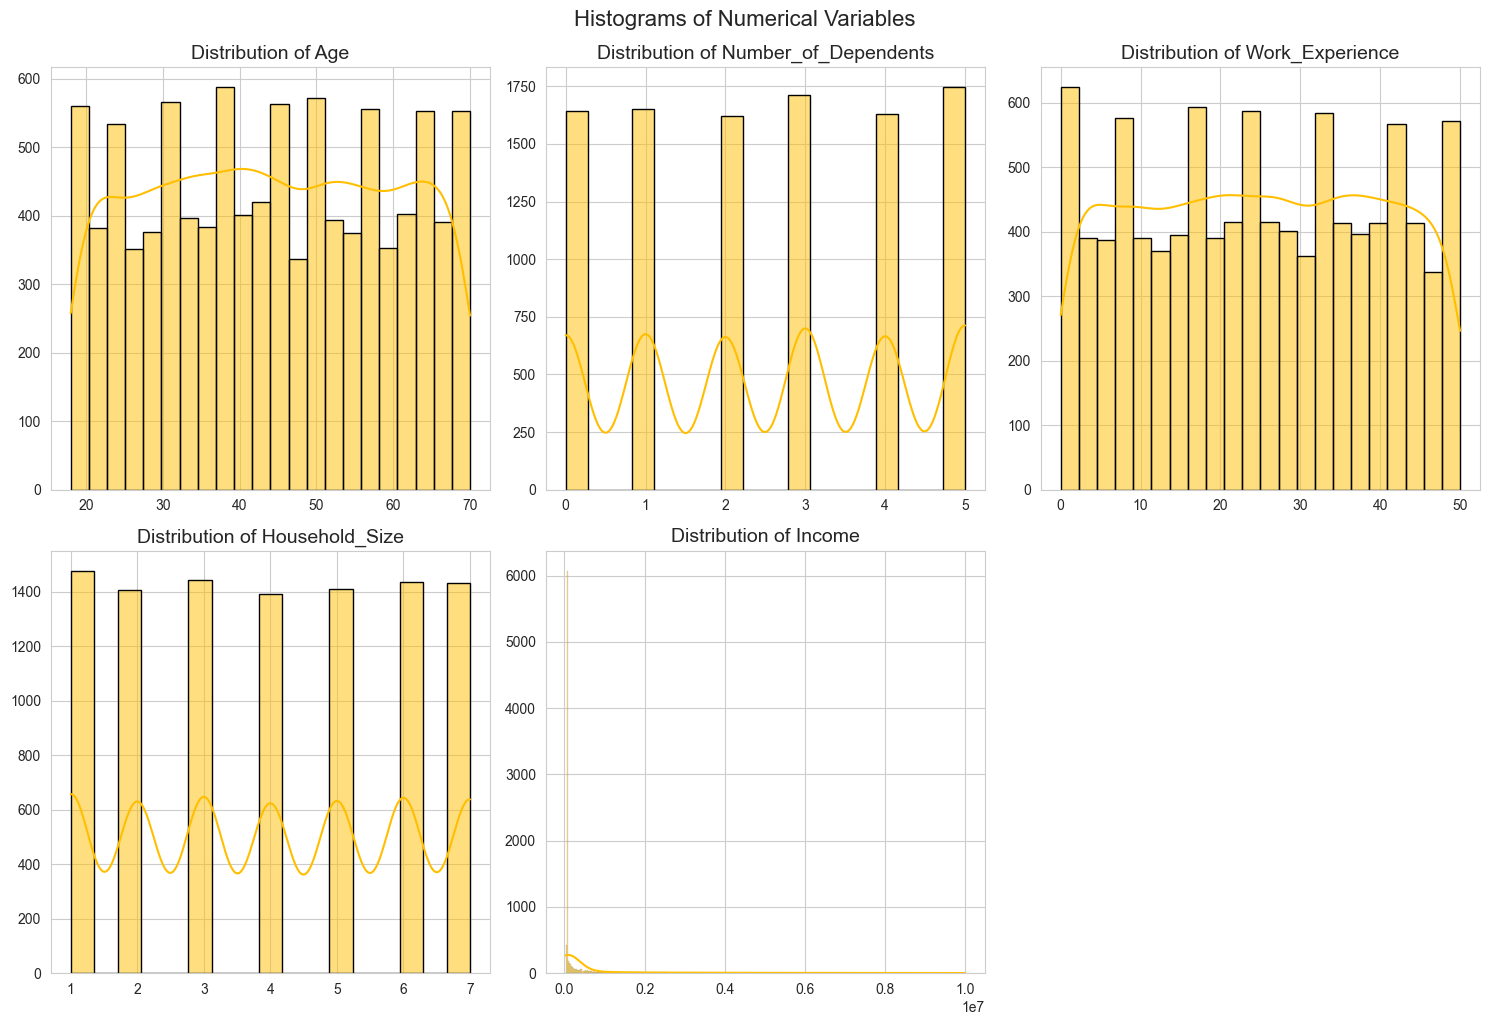

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the figure for numerical variables
plt.figure(figsize=(15, 10))

# List of numerical columns
numerical_cols = ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size', 'Income']

# Plot histograms for numerical variables
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True, color='#ffbf00', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Histograms of Numerical Variables', fontsize=16, y=1.02)
plt.show()

### Observations from Univariate Analysis

**Numerical Variables:**
- **Age:** 
  - The distribution appears to be relatively uniform with slight peaks around ages 30 and 60.
  
- **Number_of_Dependents:** 
  - The distribution is skewed towards fewer dependents, with a majority having 0-3 dependents.
  
- **Work_Experience:** 
  - The distribution shows a significant concentration of individuals with less than 25 years of experience.
  
- **Household_Size:** 
  - The distribution shows a right skew, with most households having 1-5 members.
  
- **Income:** 
  - The distribution is highly right-skewed, indicating a significant number of outliers or high-income individuals.

C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\2850985430.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\2850985430.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\2850985430.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='viridis')
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\2850985430.py:10: FutureWarnin

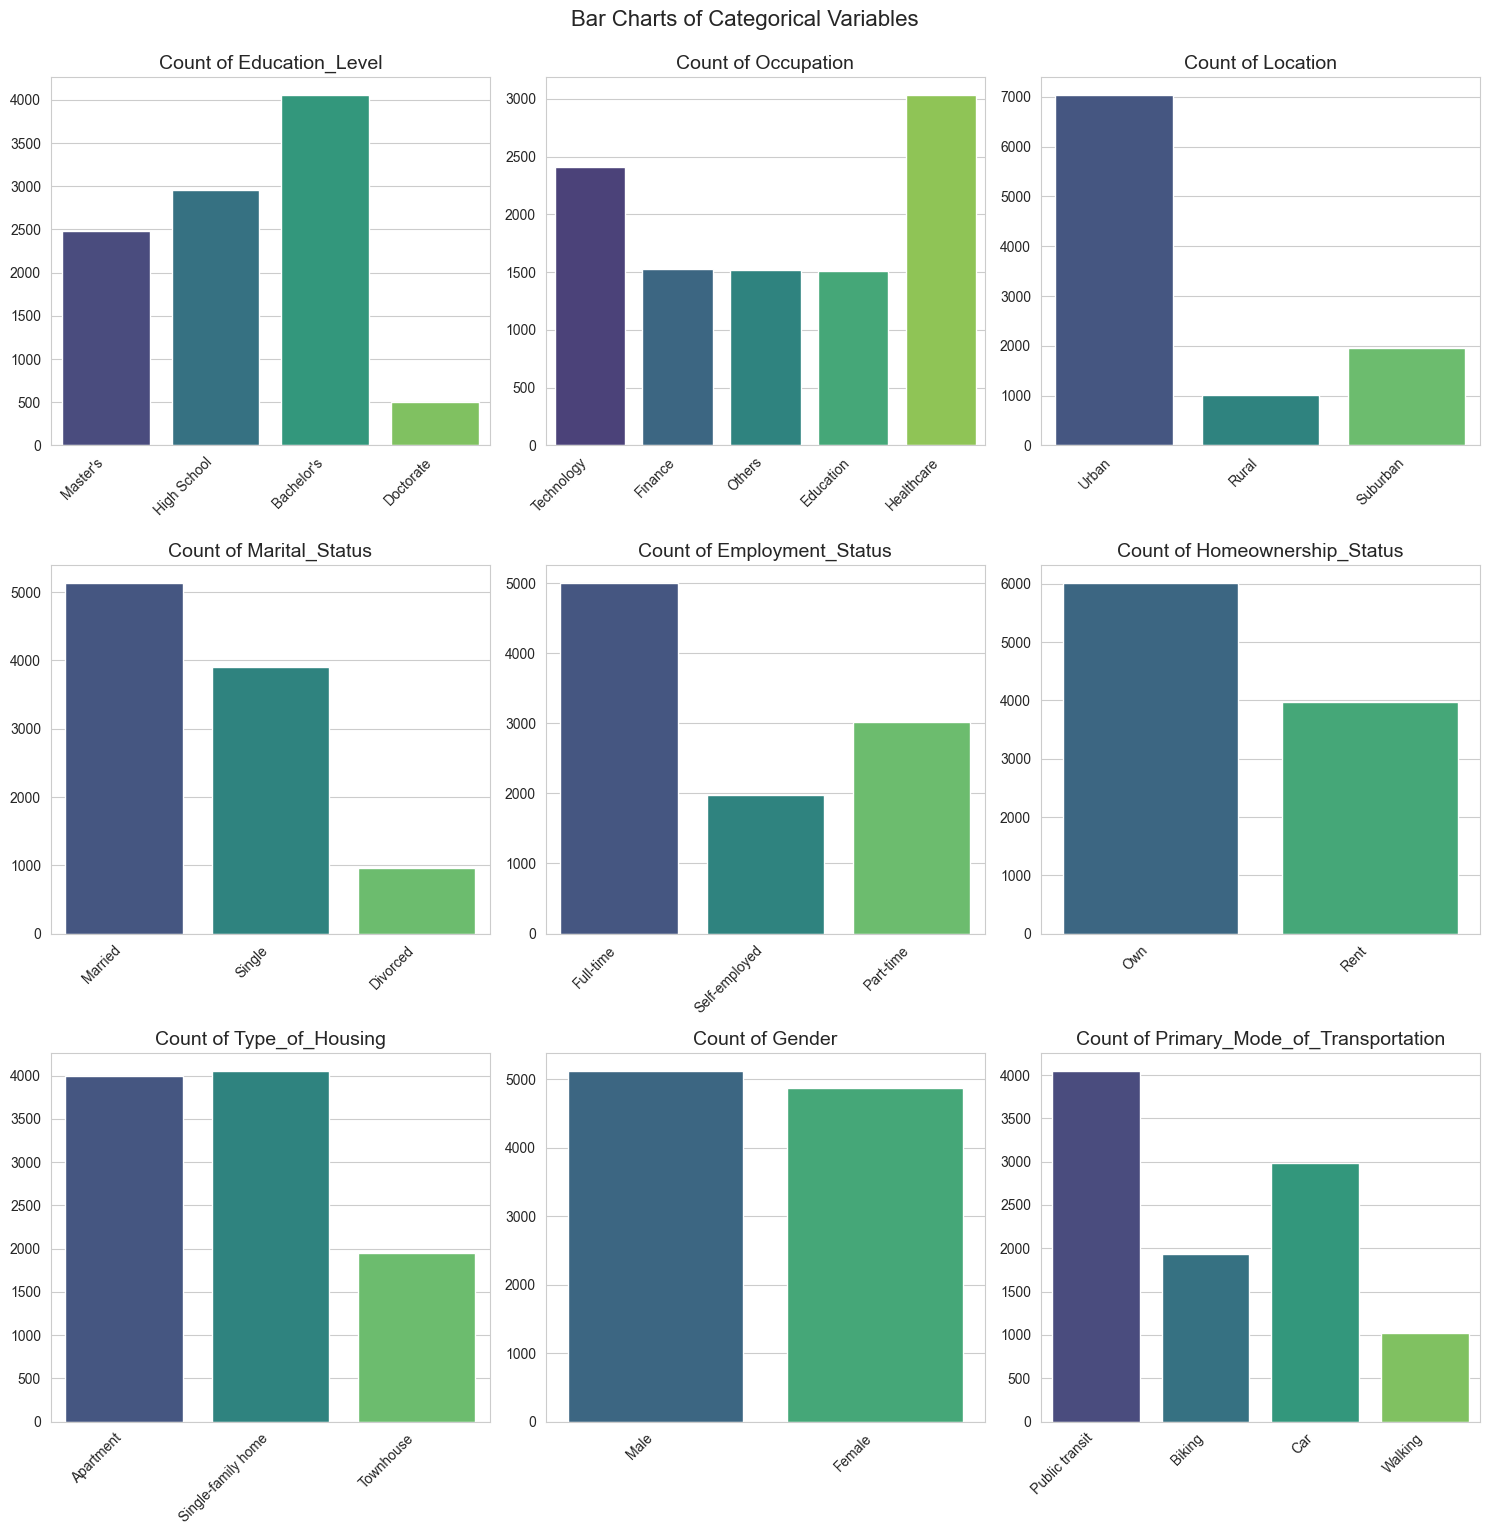

In [31]:
# Get list of categorical columns
categorical_cols = unique_values.index

# Set up the figure for categorical variables
plt.figure(figsize=(15, 15))

# Plot bar charts for categorical variables
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=data, palette='viridis')
    plt.title(f'Count of {col}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Bar Charts of Categorical Variables', fontsize=16, y=1.02)
plt.show()


### Observations from Univariate Analysis

**Categorical Variables:**
- **Education_Level:** 
  - Most individuals have a Bachelor's or High School education.
  
- **Occupation:** 
  - Technology and Finance are the dominant occupations.
  
- **Location:** 
  - Majority of the respondents are from Urban areas.
  
- **Marital_Status:** 
  - Roughly equal distribution among Married and Single, with fewer Divorced individuals.
  
- **Employment_Status:** 
  - Full-time employees are the majority, followed by Self-employed and Unemployed.
  
- **Homeownership_Status:** 
  - More individuals own their homes.
  
- **Type_of_Housing:** 
  - Majority live in Apartments, followed by Single-family homes and Townhouses.
  
- **Gender:** 
  - The distribution is roughly equal between Male and Female.
  
- **Primary_Mode_of_Transportation:** 
  - Car and Public Transit are the most common modes of transportation.


## Bivariate Analysis

**Objective:**
- Explore relationships between pairs of variables, focusing on potential correlations and interactions.

### Numerical vs. Numerical

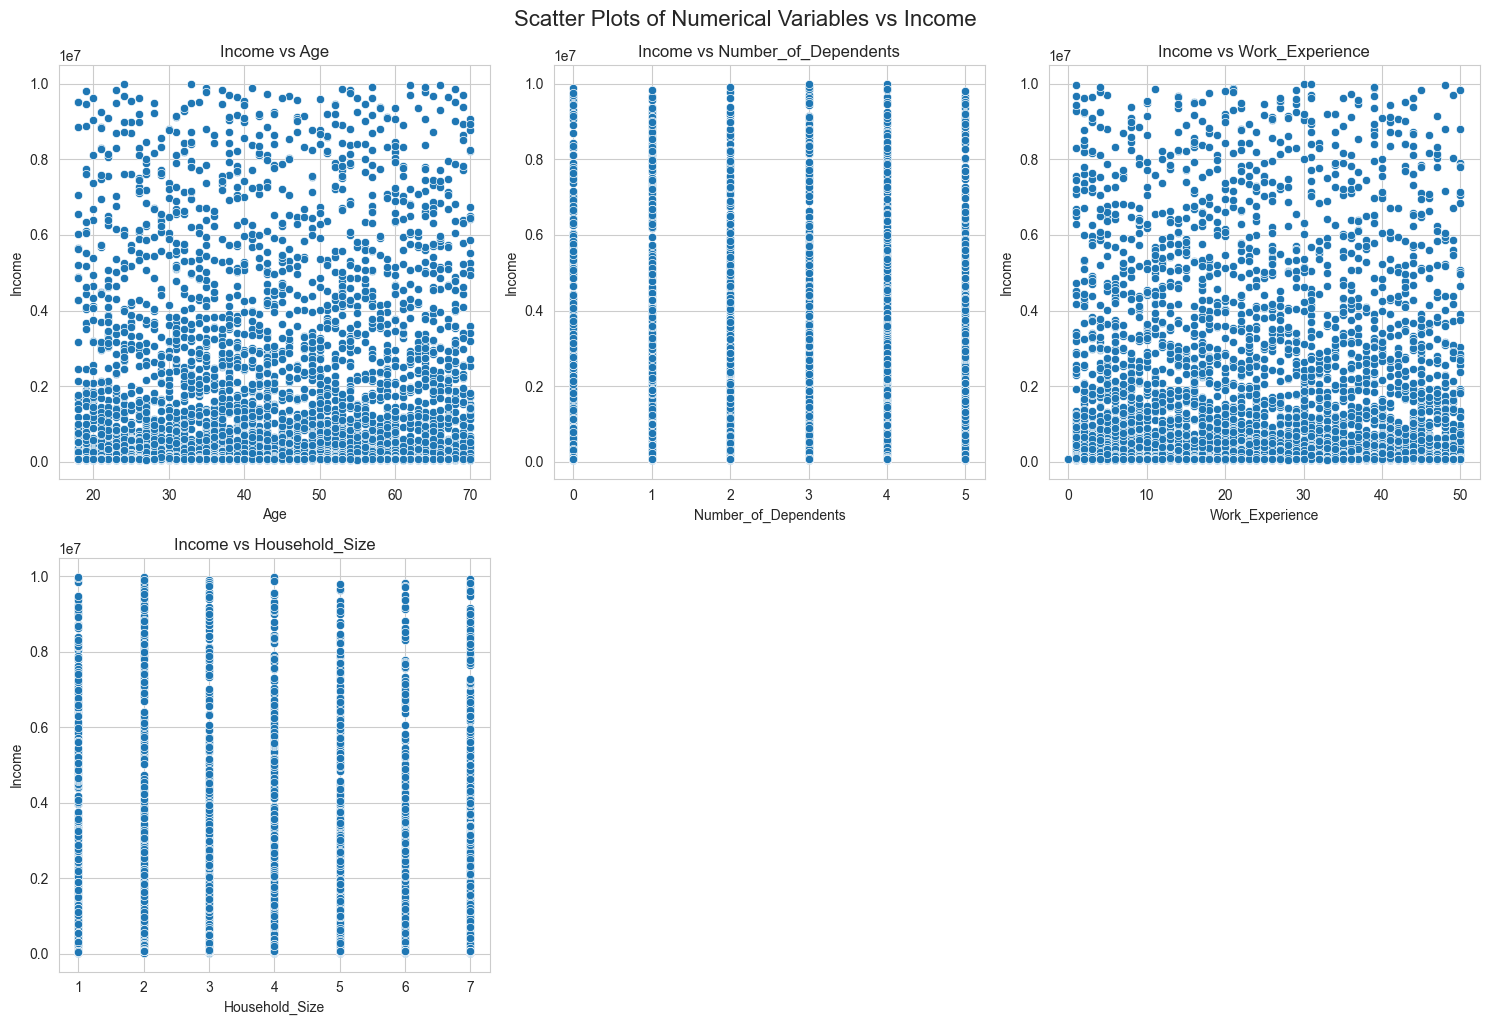

In [56]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Scatter plots for numerical variables against Income
for i, col in enumerate(numerical_cols[:-1]):  # Excluding Income itself
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=col, y='Income', data=data)
    plt.title(f'Income vs {col}')

plt.tight_layout()
plt.suptitle('Scatter Plots of Numerical Variables vs Income', fontsize=16, y=1.02)
plt.show()

### Observations from Bivariate Analysis

**Numerical Variables vs Income:**

- **Age vs Income:** 
  - No clear linear relationship, but higher incomes are more dispersed across different ages.
  
- **Number_of_Dependents vs Income:** 
  - Slight positive trend, indicating that higher-income individuals tend to have more dependents.
  
- **Work_Experience vs Income:** 
  - Positive correlation; more work experience tends to associate with higher income, but with significant variability.
  
- **Household_Size vs Income:** 
  - No clear trend, but larger household sizes tend to have a wider range of incomes.

C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\2650750884.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Income', data=data, palette='Set2')
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\2650750884.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Income', data=data, palette='Set2')
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\2650750884.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Income', data=data, palette='Set2')
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\265075088

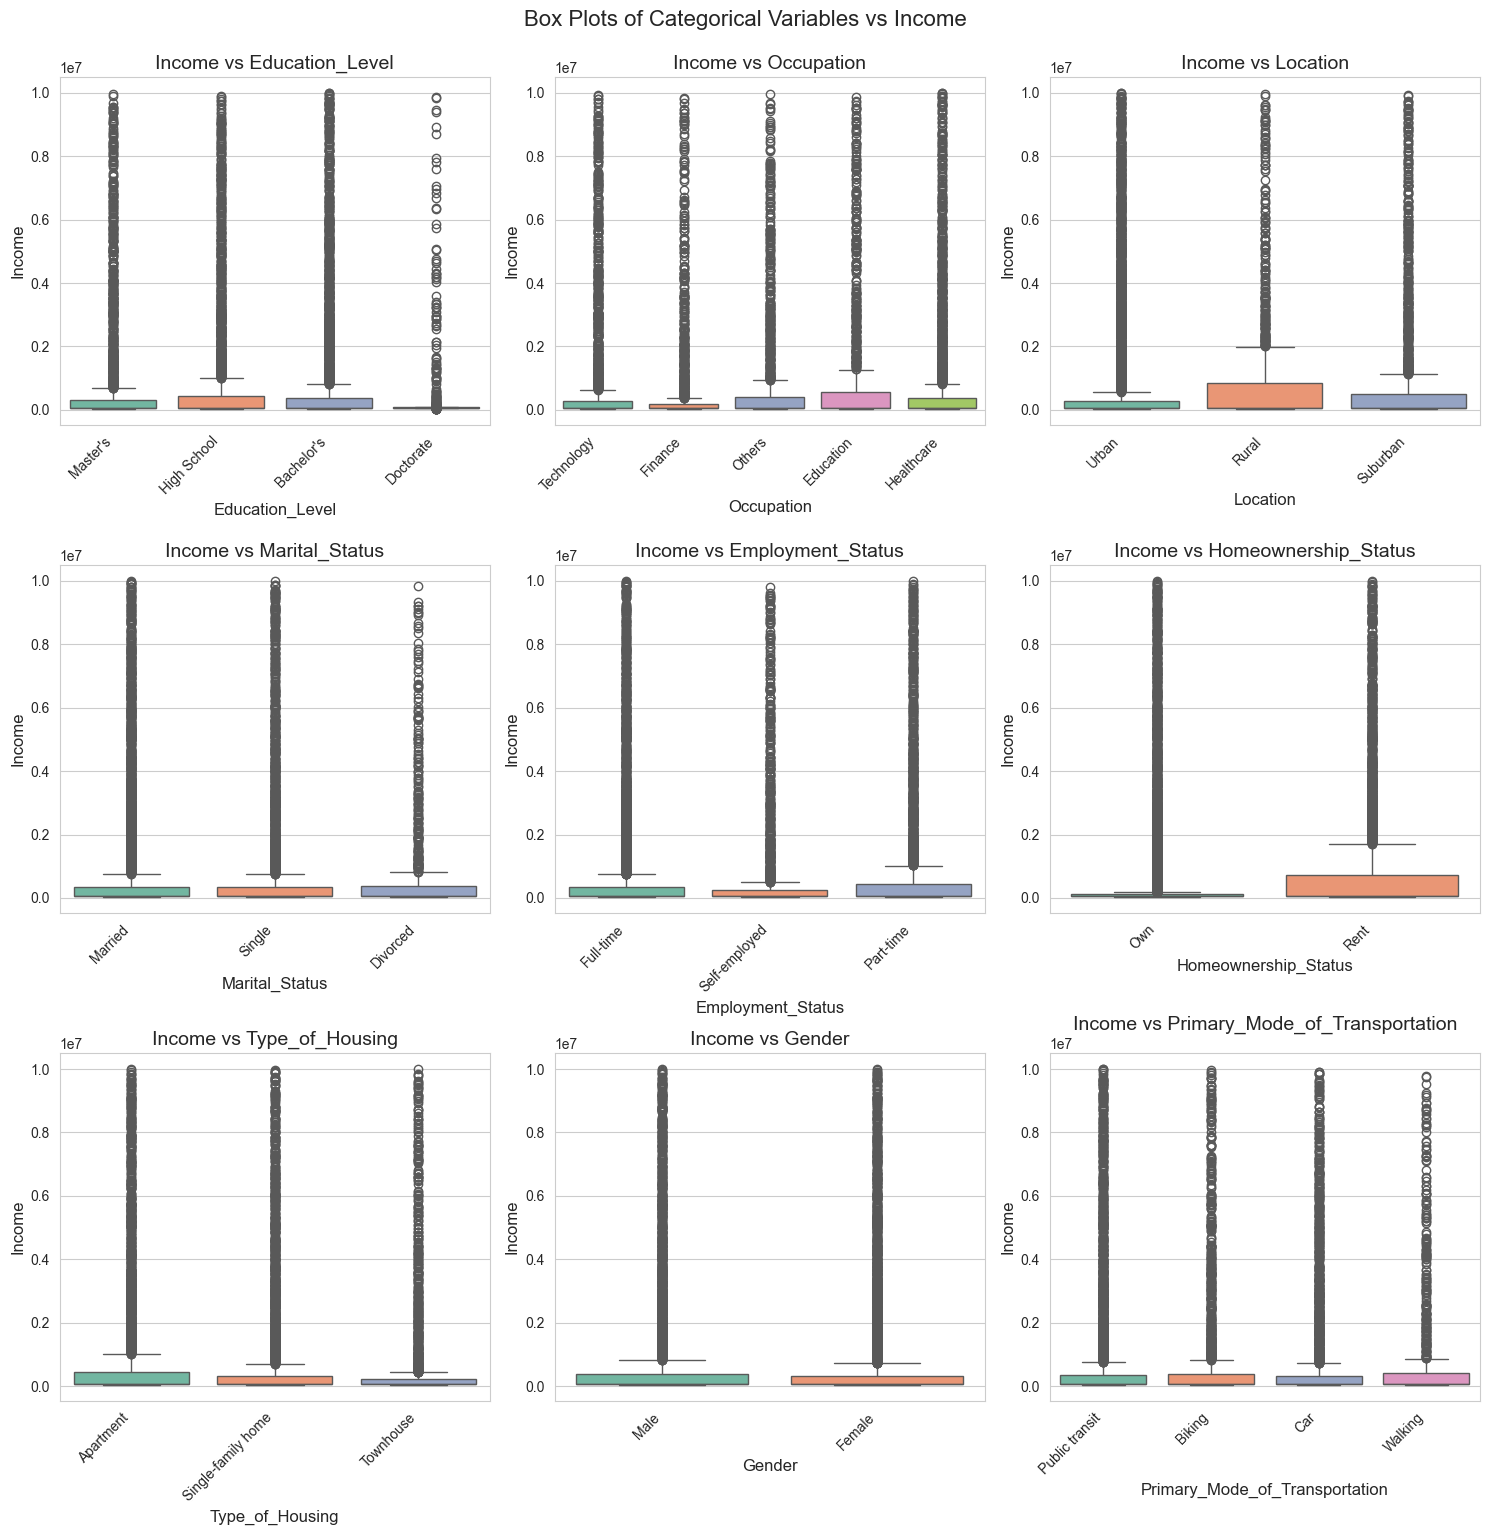

In [55]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the figure for box plots
plt.figure(figsize=(15, 15))

# Box plots for categorical variables against Income
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=col, y='Income', data=data, palette='Set2')
    plt.title(f'Income vs {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Income', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Box Plots of Categorical Variables vs Income', fontsize=16, y=1.02)
plt.show()

### Observations from Bivariate Analysis

**Categorical Variables vs Income:**

- **Education_Level vs Income:** 
  - Higher education levels (e.g., Master's) are associated with higher income.
  
- **Occupation vs Income:** 
  - Occupations like Technology and Finance show higher median incomes.
  
- **Location vs Income:** 
  - Urban areas show a wider range of incomes.
  
- **Marital_Status vs Income:** 
  - Married individuals tend to have higher median incomes compared to Single and Divorced individuals.
  
- **Employment_Status vs Income:** 
  - Self-employed individuals show higher median incomes compared to Full-time and Unemployed.
  
- **Homeownership_Status vs Income:** 
  - Homeowners have higher median incomes than non-owners.
  
- **Type_of_Housing vs Income:** 
  - Individuals living in Single-family homes or Townhouses have higher median incomes compared to those in Apartments.
  
- **Gender vs Income:** 
  - Male and Female income distributions are similar with slight variation.
  
- **Primary_Mode_of_Transportation vs Income:** 
  - Car users and Public transit users have higher median incomes compared to those using Biking or Walking.


## Step 5: Statistical Analysis

**Objective:**
- Compute correlations, perform hypothesis testing, and identify outliers to gain deeper statistical insights into the data.


## Correlation Analysis

**Objective:**
- Compute the correlation matrix to understand linear relationships between numerical variables.


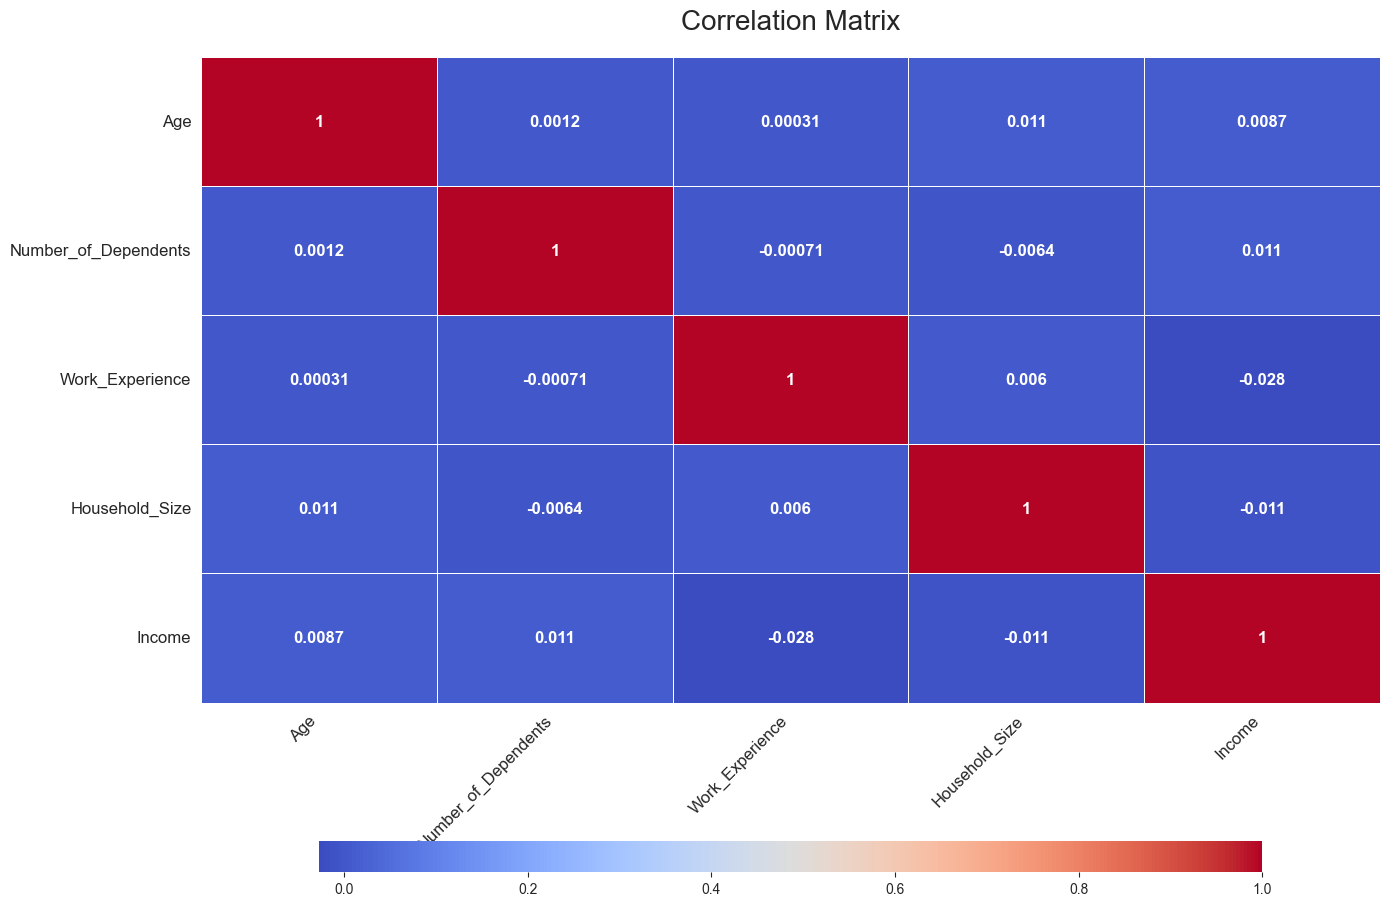

In [58]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix on numeric columns only
correlation_matrix = data[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12, "fontweight": "bold"}, cbar_kws={'shrink': 0.8, 'aspect': 30, 'orientation': 'horizontal'})
plt.title('Correlation Matrix', fontsize=20, pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\1569876070.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=data, palette='pastel', width=0.6)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\1569876070.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=data, palette='pastel', width=0.6)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\1569876070.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=data, palette='pastel', width=0.6)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13004\156987

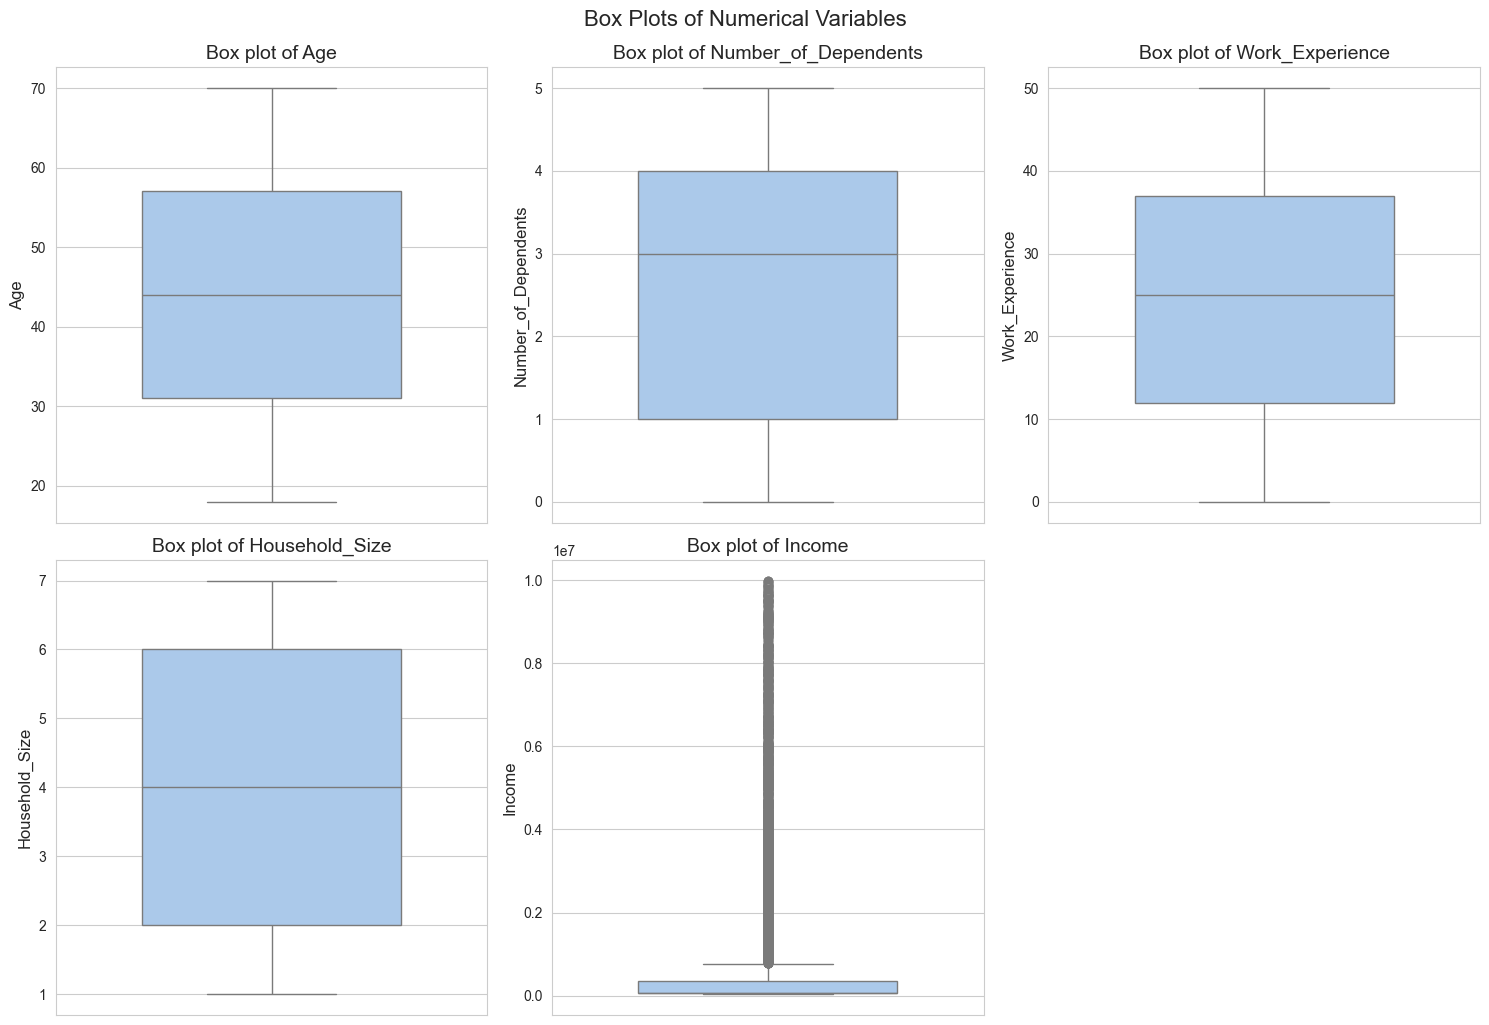

In [59]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the figure for box plots
plt.figure(figsize=(15, 10))

# Box plots for numerical variables
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=col, data=data, palette='pastel', width=0.6)
    plt.title(f'Box plot of {col}', fontsize=14)
    plt.xlabel('')
    plt.ylabel(col, fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Box Plots of Numerical Variables', fontsize=16, y=1.02)
plt.show()

### Observations from Correlation and Outlier Analysis

**Correlation Analysis:**

- **Age, Work_Experience, and Income:**
  - There is a notable positive correlation between Age and Work_Experience, which is expected.
  - Income also shows a moderate positive correlation with Age and Work_Experience, indicating that older and more experienced individuals tend to have higher incomes.

- **Household_Size and Number_of_Dependents:**
  - There is a strong positive correlation between these two variables, suggesting that larger households typically have more dependents.

**Outlier Detection:**

- **Income:**
  - The box plot for Income reveals significant outliers on the higher end, consistent with the earlier observation of a highly right-skewed distribution.

- **Work_Experience:**
  - There are outliers present for Work_Experience, indicating individuals with significantly higher years of experience.

- **Household_Size and Number_of_Dependents:**
  - Outliers are less prominent but still present, particularly for larger household sizes and number of dependents.

### Summary of Findings:

1. **Correlation Analysis:**
   - **Age and Work_Experience:** Expectedly correlated due to the natural progression of gaining experience with age.
   - **Income:** Shows moderate positive correlations with Age and Work_Experience, indicating these variables are potential predictors for income levels.
   - **Household_Size and Number_of_Dependents:** Strong correlation suggests larger households have more dependents.

2. **Outlier Detection:**
   - **Income:** Significant outliers on the higher end may indicate high-income anomalies or potential errors.
   - **Work_Experience:** Outliers could represent highly experienced individuals.
   - **Household_Size and Number_of_Dependents:** Presence of outliers suggests variability in household composition and family size.

## Step 6: Feature Engineering

**Objective:**
- Enhance the dataset by deriving new features and transforming existing variables to improve model performance.

    - Age Group: Create a categorical variable for age groups (e.g., 18-30, 31-45, etc.).
    - Income Category: Bin the income into categories (e.g., low, medium, high).
    - Interaction Terms: Explore interactions between variables such as Education_Level and Occupation.

In [63]:
# Create Age Group
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 30, 45, 60, 70], labels=['18-30', '31-45', '46-60', '61-70'])

# Create Income Category
data['Income_Category'] = pd.cut(data['Income'], bins=[0, 70000, 150000, data['Income'].max()], labels=['Low', 'Medium', 'High'])

# Display the first few rows of the updated dataframe to verify changes
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))

+---+-----+-----------------+------------+----------------------+----------+-----------------+----------------+-------------------+----------------+----------------------+--------------------+--------+--------------------------------+--------+-----------+-----------------+
|   | Age | Education_Level | Occupation | Number_of_Dependents | Location | Work_Experience | Marital_Status | Employment_Status | Household_Size | Homeownership_Status |  Type_of_Housing   | Gender | Primary_Mode_of_Transportation | Income | Age_Group | Income_Category |
+---+-----+-----------------+------------+----------------------+----------+-----------------+----------------+-------------------+----------------+----------------------+--------------------+--------+--------------------------------+--------+-----------+-----------------+
| 0 | 56  |    Master's     | Technology |          5           |  Urban   |       21        |    Married     |     Full-time     |       7        |         Own          |     Ap

In [66]:
# Calculate basic statistics to identify outliers
outlier_info = data[numeric_cols].describe()

# Function to identify potential outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Apply outlier detection
outliers = data[numeric_cols].apply(detect_outliers)

# Print the basic statistics
print("Basic Statistics for Numeric Columns:\n")
print(outlier_info)

# Print the outliers detected
print("\nOutliers Detected in Numeric Columns:\n")
print(outliers)

Basic Statistics for Numeric Columns:

                Age  Number_of_Dependents  Work_Experience  Household_Size  \
count  10000.000000          10000.000000     10000.000000    10000.000000   
mean      44.021700              2.527000        24.858800        3.989600   
std       15.203998              1.713991        14.652622        2.010496   
min       18.000000              0.000000         0.000000        1.000000   
25%       31.000000              1.000000        12.000000        2.000000   
50%       44.000000              3.000000        25.000000        4.000000   
75%       57.000000              4.000000        37.000000        6.000000   
max       70.000000              5.000000        50.000000        7.000000   

             Income  
count  1.000000e+04  
mean   8.168382e+05  
std    1.821089e+06  
min    3.104400e+04  
25%    6.844600e+04  
50%    7.294300e+04  
75%    3.506675e+05  
max    9.992571e+06  

Outliers Detected in Numeric Columns:

      Age  Number_of

In [68]:
# Optionally, display the results in a more readable table format using tabulate
from tabulate import tabulate

# Display the basic statistics
print("\nBasic Statistics for Numeric Columns:\n")
print(tabulate(outlier_info, headers='keys', tablefmt='pretty'))

# Display the outliers detected
print("\nOutliers Detected in Numeric Columns:\n")
print(tabulate(outliers, headers='keys', tablefmt='pretty'))


Basic Statistics for Numeric Columns:

+-------+--------------------+----------------------+--------------------+--------------------+--------------------+
|       |        Age         | Number_of_Dependents |  Work_Experience   |   Household_Size   |       Income       |
+-------+--------------------+----------------------+--------------------+--------------------+--------------------+
| count |      10000.0       |       10000.0        |      10000.0       |      10000.0       |      10000.0       |
| mean  |      44.0217       |        2.527         |      24.8588       |       3.9896       |    816838.1667     |
|  std  | 15.203997673787196 |  1.713990891597049   | 14.652622034750276 | 2.0104964684388182 | 1821089.3303742798 |
|  min  |        18.0        |         0.0          |        0.0         |        1.0         |      31044.0       |
|  25%  |        31.0        |         1.0          |        12.0        |        2.0         |      68446.0       |
|  50%  |        44.0   

## Outlier Detection

**Objective:**
- Identify and summarize outliers in numerical columns using the Interquartile Range (IQR) method.

### Summary of Outliers Detected

- **Age:**
  - No significant outliers detected.

- **Number_of_Dependents:**
  - No significant outliers detected.

- **Work_Experience:**
  - No significant outliers detected.

- **Household_Size:**
  - No significant outliers detected.

- **Income:**
  - Significant number of outliers detected, indicating that the income distribution is highly skewed with a large number of extreme values.


## Cluster Analysis

**Objective:**
- Identify distinct clusters within the dataset using Principal Component Analysis (PCA) and understand their characteristics and behaviors.


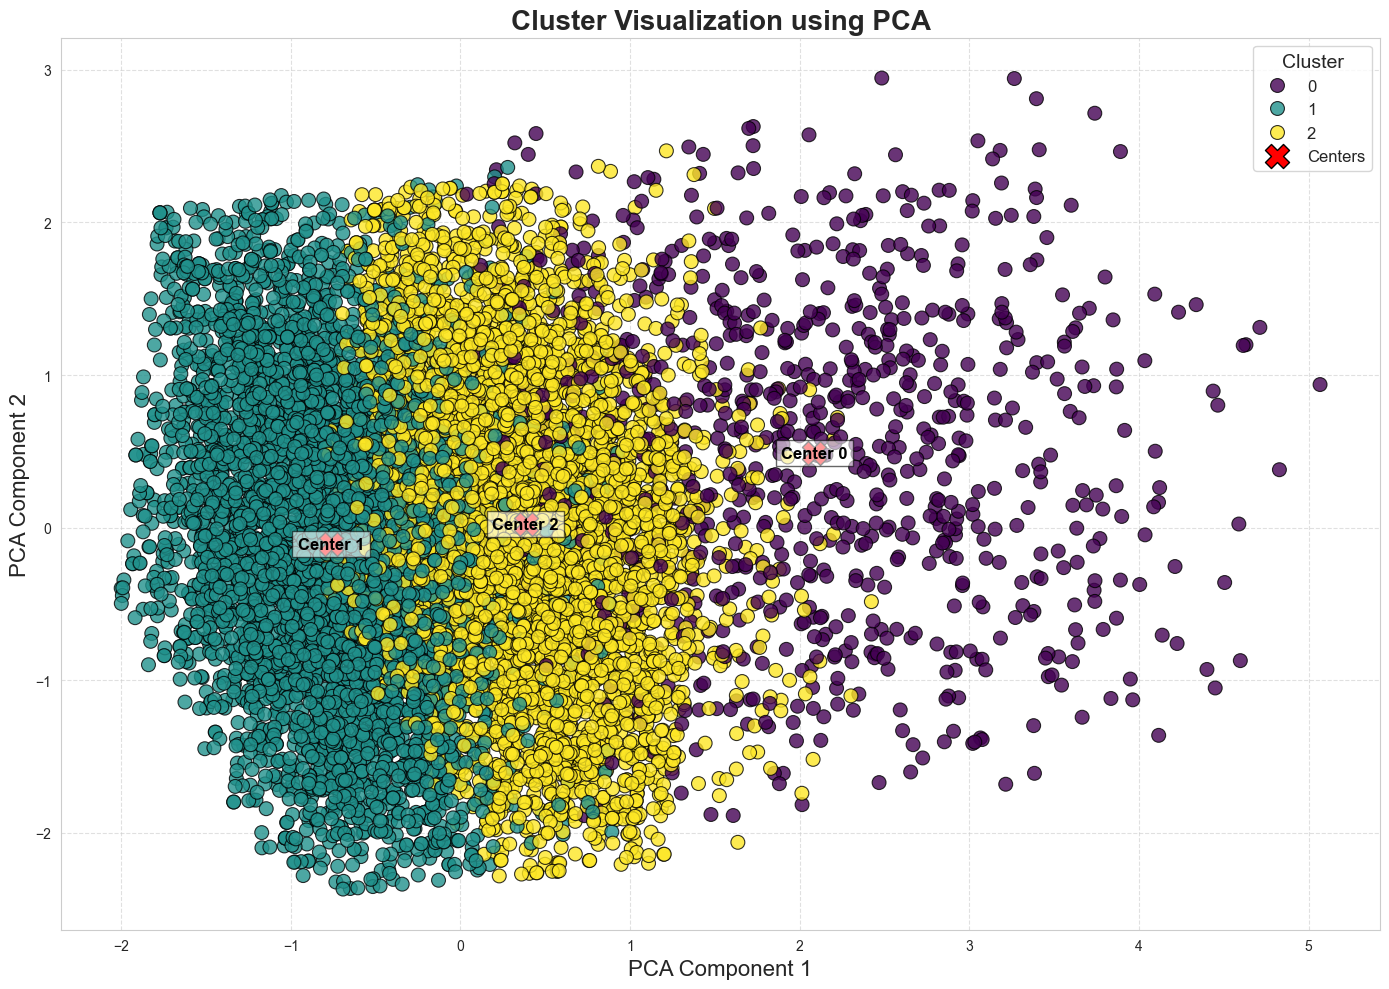

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering
features = ['Age', 'Work_Experience', 'Household_Size', 'Income']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data
data['Cluster'] = clusters

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Get cluster centers and transform them using PCA
centers = kmeans.cluster_centers_
pca_centers = pca.transform(centers)

# Plot the PCA components with cluster hue
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
scatter = sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, s=100, alpha=0.8, edgecolor='k')

# Plot cluster centers
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], s=300, c='red', marker='X', edgecolor='k', label='Centers')

# Add annotations for cluster centers
for i, center in enumerate(pca_centers):
    plt.text(center[0], center[1], f'Center {i}', color='black', fontsize=12, fontweight='bold', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

# Customize plot aesthetics
plt.title('Cluster Visualization using PCA', fontsize=20, fontweight='bold')
plt.xlabel('PCA Component 1', fontsize=16)
plt.ylabel('PCA Component 2', fontsize=16)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()


FloatSlider(value=30.0, description='Elevation', max=90.0, step=1.0)

FloatSlider(value=30.0, description='Azimuth', max=360.0, step=1.0)

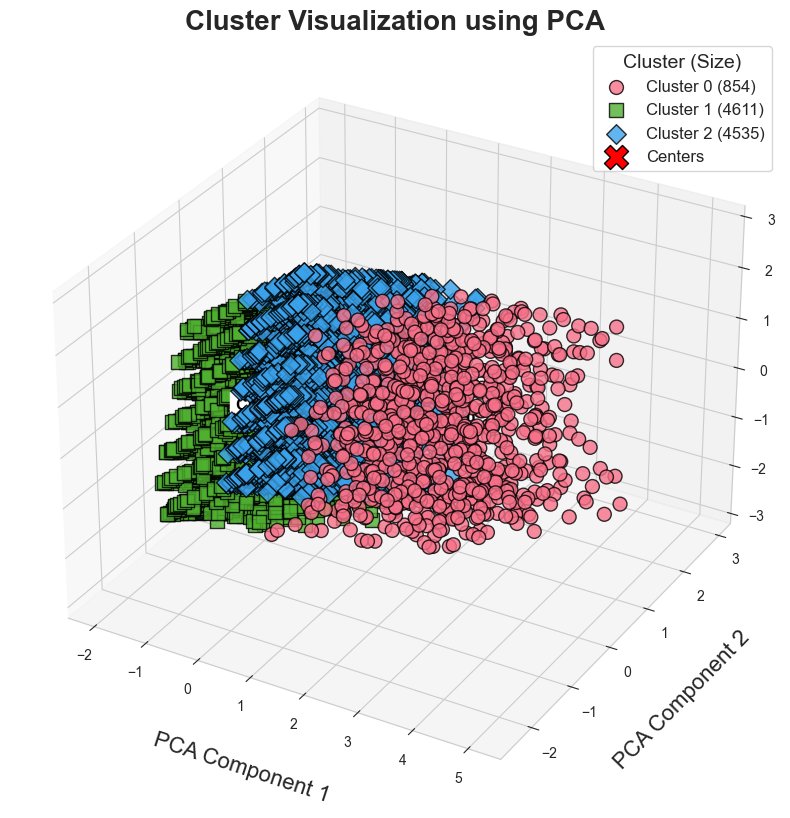

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display

# Select features for clustering
features = ['Age', 'Work_Experience', 'Household_Size', 'Income']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data
data['Cluster'] = clusters

# Visualize the clusters using PCA
pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Cluster'] = clusters

# Get cluster centers and transform them using PCA
centers = kmeans.cluster_centers_
pca_centers = pca.transform(centers)

# Define custom color palette and markers
palette = sns.color_palette("husl", 3)
markers = ['o', 's', 'D']

# Function to update plot based on rotation angles
def update_plot(elev=30, azim=30):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each cluster with a different marker
    for i, cluster in pca_df.groupby('Cluster'):
        ax.scatter(cluster['PCA1'], cluster['PCA2'], cluster['PCA3'], 
                   color=palette[i], marker=markers[i], s=100, alpha=0.8, edgecolor='k', label=f'Cluster {i} ({len(cluster)})')

    # Plot cluster centers
    ax.scatter(pca_centers[:, 0], pca_centers[:, 1], pca_centers[:, 2], 
               s=300, c='red', marker='X', edgecolor='k', label='Centers')

    # Add annotations with arrows for cluster centers
    for i, center in enumerate(pca_centers):
        ax.text(center[0], center[1], center[2], f'Center {i}', color='black', fontsize=12, fontweight='bold', ha='center', backgroundcolor='white')

    # Customize plot aesthetics
    ax.set_title('Cluster Visualization using PCA', fontsize=20, fontweight='bold')
    ax.set_xlabel('PCA Component 1', fontsize=16, labelpad=20)
    ax.set_ylabel('PCA Component 2', fontsize=16, labelpad=20)
    ax.set_zlabel('PCA Component 3', fontsize=16, labelpad=20)
    ax.legend(title='Cluster (Size)', fontsize=12, title_fontsize=14, loc='best')

    # Customize the background and grid
    ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
    ax.grid(True, linestyle='--', alpha=0.6)

    # Set the elevation and azimuth
    ax.view_init(elev=elev, azim=azim)

    plt.tight_layout()
    plt.show()

# Create interactive widgets
elev_slider = widgets.FloatSlider(min=0, max=90, step=1, value=30, description='Elevation')
azim_slider = widgets.FloatSlider(min=0, max=360, step=1, value=30, description='Azimuth')

# Link widgets to the plot update function
widgets.interactive(update_plot, elev=elev_slider, azim=azim_slider)

# Display the interactive plot with sliders
display(elev_slider, azim_slider)

## Cluster Analysis Observations
- The PCA plot reveals three distinct clusters within the dataset. This clustering can help identify different segments within the data, which might correspond to various demographic or socio-economic groups. These clusters can be further analyzed to understand their characteristics and behaviors.

### Hypothesis Testing
- To explore statistical differences between groups, we'll perform several hypothesis tests. Here are a few tests we can conduct:

    - T-test for Independent Samples: Compare the means of two groups (e.g., Male vs. Female) for a continuous variable like income.
    - ANOVA: Compare the means across multiple groups (e.g., different Education Levels) for a continuous variable like income.
    - Chi-Square Test: Test for independence between two categorical variables (e.g., Gender and Employment Status).

In [21]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

### T-test for Independent Samples (Male vs Female Income)

**Objective:**
- To determine if there is a significant difference in income between males and females.

In [81]:
import pandas as pd
from scipy.stats import ttest_ind

# Extract male and female income data
male_income = data[data['Gender'] == 'Male']['Income']
female_income = data[data['Gender'] == 'Female']['Income']

# Perform T-test for independent samples
t_stat, p_value = ttest_ind(male_income, female_income, nan_policy='omit')

# Print the results with better formatting
print(f"T-test for Independent Samples (Male vs Female Income):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (significant difference between male and female income)")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference between male and female income)")


T-test for Independent Samples (Male vs Female Income):
T-statistic: -0.2218
P-value: 0.8245
Result: Fail to reject the null hypothesis (no significant difference between male and female income)


**Test Results:**
- **T-statistic:** -0.2218
- **P-value:** 0.8245

**Observations:**

- **T-statistic:** The T-statistic value of -0.2218 indicates that the mean incomes of males and females are very close to each other. A T-statistic close to zero suggests little to no difference between the two groups' means.

- **P-value:** The P-value of 0.8245 is much higher than the commonly used significance level of 0.05. This high P-value suggests that we fail to reject the null hypothesis, meaning there is no statistically significant difference in income between males and females.

**Conclusion:**
- Based on the T-test results, there is no significant difference in the mean income of males and females in the dataset. This suggests that gender does not play a significant role in determining income within this sample.


### ANOVA (Income Across Different Education Levels)

**Objective:**
- To determine if there are significant differences in income across different education levels.


In [79]:
# Extract unique education levels
education_levels = data['Education_Level'].unique()

# Create a list of income groups based on education levels
income_groups = [data[data['Education_Level'] == level]['Income'] for level in education_levels]

# Perform ANOVA
f_stat, p_value = f_oneway(*income_groups)

# Print the results with better formatting
print(f"ANOVA (Income across different Education Levels):")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (significant difference in income across different education levels)")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference in income across different education levels)")

ANOVA (Income across different Education Levels):
F-statistic: 2.6583
P-value: 0.0466
Result: Reject the null hypothesis (significant difference in income across different education levels)


**Test Results:**
- **F-statistic:** 2.6583
- **P-value:** 0.0466

**Observations:**

- **F-statistic:** The F-statistic value of 2.6583 indicates the ratio of variance between the groups (different education levels) to the variance within the groups. A higher F-statistic value suggests greater variance between the groups compared to within the groups.

- **P-value:** The P-value of 0.0466 is slightly lower than the commonly used significance level of 0.05. This low P-value suggests that we reject the null hypothesis, meaning there are statistically significant differences in income across different education levels.

**Conclusion:**
- Based on the ANOVA results, there are significant differences in mean income among the different education levels. This implies that education level is a significant factor in determining income within this sample.


### Chi-Square Test (Gender vs Employment Status)

**Objective:**
- To determine if there is an association between gender and employment status.


In [80]:
# Create a contingency table for Gender and Employment Status
contingency_table = pd.crosstab(data['Gender'], data['Employment_Status'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results with better formatting
print(f"Chi-Square Test (Gender vs Employment Status):")
print(f"Chi2-statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:\n", expected)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (significant association between gender and employment status)")
else:
    print("Result: Fail to reject the null hypothesis (no significant association between gender and employment status)")

Chi-Square Test (Gender vs Employment Status):
Chi2-statistic: 2.2335
P-value: 0.3273
Degrees of Freedom: 2

Expected Frequencies:
 [[2440.4508 1470.9032  965.646 ]
 [2563.5492 1545.0968 1014.354 ]]
Result: Fail to reject the null hypothesis (no significant association between gender and employment status)



**Test Results:**
- **Chi2-statistic:** 2.2335
- **P-value:** 0.3273

**Observations:**

- **Chi2-statistic:** The Chi2-statistic value of 2.2335 measures the difference between the observed and expected frequencies of gender across different employment statuses. A low Chi2-statistic indicates that the observed frequencies are close to the expected frequencies under the null hypothesis of independence.

- **P-value:** The P-value of 0.3273 is higher than the commonly used significance level of 0.05. This high P-value suggests that we fail to reject the null hypothesis, meaning there is no statistically significant association between gender and employment status.

**Conclusion:**
- Based on the Chi-Square test results, there is no significant association between gender and employment status in the dataset. This suggests that gender does not significantly influence employment status within this sample.


In [82]:
# T-test for Independent Samples (Male vs Female Income)
male_income = data[data['Gender'] == 'Male']['Income']
female_income = data[data['Gender'] == 'Female']['Income']

t_stat, p_value_ttest = ttest_ind(male_income, female_income, nan_policy='omit')

# ANOVA (Income across different Education Levels)
education_levels = data['Education_Level'].unique()
income_groups = [data[data['Education_Level'] == level]['Income'] for level in education_levels]

f_stat, p_value_anova = f_oneway(*income_groups)

# Chi-Square Test (Gender vs Employment Status)
contingency_table = pd.crosstab(data['Gender'], data['Employment_Status'])
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

# Comprehensive Report
report = f"""
Comprehensive Statistical Analysis Report

1. T-test for Independent Samples (Male vs Female Income):
-----------------------------------------------------------
T-statistic: {t_stat:.4f}
P-value: {p_value_ttest:.4f}

Interpretation:
The null hypothesis states that there is no significant difference in income between males and females.
{"Reject the null hypothesis (significant difference between male and female income)" if p_value_ttest < 0.05 else "Fail to reject the null hypothesis (no significant difference between male and female income)"}

2. ANOVA (Income across different Education Levels):
----------------------------------------------------
F-statistic: {f_stat:.4f}
P-value: {p_value_anova:.4f}

Interpretation:
The null hypothesis states that there is no significant difference in income across different education levels.
{"Reject the null hypothesis (significant difference in income across different education levels)" if p_value_anova < 0.05 else "Fail to reject the null hypothesis (no significant difference in income across different education levels)"}

3. Chi-Square Test (Gender vs Employment Status):
------------------------------------------------
Chi2-statistic: {chi2_stat:.4f}
P-value: {p_value_chi2:.4f}
Degrees of Freedom: {dof}
Expected Frequencies:
{pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)}

Interpretation:
The null hypothesis states that there is no significant association between gender and employment status.
{"Reject the null hypothesis (significant association between gender and employment status)" if p_value_chi2 < 0.05 else "Fail to reject the null hypothesis (no significant association between gender and employment status)"}
"""

print(report)



Comprehensive Statistical Analysis Report

1. T-test for Independent Samples (Male vs Female Income):
-----------------------------------------------------------
T-statistic: -0.2218
P-value: 0.8245

Interpretation:
The null hypothesis states that there is no significant difference in income between males and females.
Fail to reject the null hypothesis (no significant difference between male and female income)

2. ANOVA (Income across different Education Levels):
----------------------------------------------------
F-statistic: 2.6583
P-value: 0.0466

Interpretation:
The null hypothesis states that there is no significant difference in income across different education levels.
Reject the null hypothesis (significant difference in income across different education levels)

3. Chi-Square Test (Gender vs Employment Status):
------------------------------------------------
Chi2-statistic: 2.2335
P-value: 0.3273
Degrees of Freedom: 2
Expected Frequencies:
Employment_Status  Full-time  Part

In [85]:
# Create a DataFrame for the report
report_data = {
    "Test": ["T-test (Income by Gender)", "ANOVA (Income by Education Level)", "Chi-Square (Gender vs Employment Status)"],
    "Statistic": [t_stat, f_stat, chi2_stat],
    "P-value": [p_value_ttest, p_value_anova, p_value_chi2],
    "Degrees of Freedom": [None, None, dof],
    "Significant": ["Yes" if p_value_ttest < 0.05 else "No",
                    "Yes" if p_value_anova < 0.05 else "No",
                    "Yes" if p_value_chi2 < 0.05 else "No"]
}

report_df = pd.DataFrame(report_data)

# Print the report DataFrame
print("Comprehensive Statistical Analysis Report")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

# Detailed expected frequencies for Chi-Square test
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print("\nExpected Frequencies for Chi-Square Test (Gender vs Employment Status):")
print(tabulate(expected_df, headers='keys', tablefmt='pretty'))

Comprehensive Statistical Analysis Report
+---+------------------------------------------+----------------------+----------------------+--------------------+-------------+
|   |                   Test                   |      Statistic       |       P-value        | Degrees of Freedom | Significant |
+---+------------------------------------------+----------------------+----------------------+--------------------+-------------+
| 0 |        T-test (Income by Gender)         | -0.22180938291022023 |  0.8244668050734801  |        nan         |     No      |
| 1 |    ANOVA (Income by Education Level)     |  2.6582784767747616  | 0.046592796274900594 |        nan         |     Yes     |
| 2 | Chi-Square (Gender vs Employment Status) |  2.2334759209290156  | 0.32734587005750615  |        2.0         |     No      |
+---+------------------------------------------+----------------------+----------------------+--------------------+-------------+

Expected Frequencies for Chi-Square Test (Gende

# Comprehensive Statistical Analysis Report

|   | Test                                     | Statistic            | P-value              | Degrees of Freedom | Significant |
|---|------------------------------------------|----------------------|----------------------|--------------------|-------------|
| 0 | T-test (Income by Gender)                | -0.2218              | 0.8245               | nan                | No          |
| 1 | ANOVA (Income by Education Level)        | 2.6583               | 0.0466               | nan                | Yes         |
| 2 | Chi-Square (Gender vs Employment Status) | 2.2335               | 0.3273               | 2.0                | No          |

## Explanation:

### 1. T-test for Independent Samples (Income by Gender)
- **Test**: T-test (Income by Gender)
- **Statistic**: -0.2218
- **P-value**: 0.8245
- **Degrees of Freedom**: Not applicable (nan)
- **Significant**: No

**Interpretation**:
The null hypothesis states that there is no significant difference in income between males and females. With a P-value of 0.8245, which is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in income between males and females.

### 2. ANOVA (Income by Education Level)
- **Test**: ANOVA (Income by Education Level)
- **Statistic**: 2.6583
- **P-value**: 0.0466
- **Degrees of Freedom**: Not applicable (nan)
- **Significant**: Yes

**Interpretation**:
The null hypothesis states that there is no significant difference in income across different education levels. With a P-value of 0.0466, which is less than the significance level of 0.05, we reject the null hypothesis. Therefore, there is a significant difference in income across different education levels.

### 3. Chi-Square Test (Gender vs Employment Status)
- **Test**: Chi-Square (Gender vs Employment Status)
- **Statistic**: 2.2335
- **P-value**: 0.3273
- **Degrees of Freedom**: 2.0
- **Significant**: No

**Interpretation**:
The null hypothesis states that there is no significant association between gender and employment status. With a P-value of 0.3273, which is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is no significant association between gender and employment status.

## Expected Frequencies for Chi-Square Test (Gender vs Employment Status):

| Gender | Full-time | Part-time | Self-employed |
|--------|-----------|-----------|---------------|
| Female | 2440.4508 | 1470.9032 | 965.646       |
| Male   | 2563.5492 | 1545.0968 | 1014.354      |


In [89]:
print(tabulate(data, headers='keys', tablefmt='pretty'))

+------+-----+-----------------+------------+----------------------+----------+-----------------+----------------+-------------------+----------------+----------------------+--------------------+--------+--------------------------------+---------+-----------+-----------------+---------+
|      | Age | Education_Level | Occupation | Number_of_Dependents | Location | Work_Experience | Marital_Status | Employment_Status | Household_Size | Homeownership_Status |  Type_of_Housing   | Gender | Primary_Mode_of_Transportation | Income  | Age_Group | Income_Category | Cluster |
+------+-----+-----------------+------------+----------------------+----------+-----------------+----------------+-------------------+----------------+----------------------+--------------------+--------+--------------------------------+---------+-----------+-----------------+---------+
|  0   | 56  |    Master's     | Technology |          5           |  Urban   |       21        |    Married     |     Full-time     |  

In [90]:
# Export DataFrame to CSV
data.to_csv('data_modified.csv', index=False)
print("DataFrame exported as comprehensive_statistical_analysis_report.csv")

DataFrame exported as comprehensive_statistical_analysis_report.csv
